##### The 5 stages for Data Analysis
* Ask Questions
* Wrangle Data : Gather, Assess and Clean
* Expore the data: Exploratory data analysis
* Draw conclusion : machine learning, inferential statistics, descriptive statistics.
* Communicate: Your analysis is only as valuable as your ability to communicate.

In [3]:
import pandas as pd

In [9]:
df_red = pd.read_csv('winequality-red.csv',sep=';')
df_white = pd.read_csv('winequality-white.csv',sep=';')

In [10]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Ask Question 

##### Quiz 1:

1. What chemical characteristics are most important in predicting the quality of wine?

In [16]:
df_chem = df_red.drop(['density', 'pH'],axis=1)
df_corr=df_chem.corr()

In [19]:
df1 = df_corr.stack().reset_index().rename(columns={'level_0': "C1", "level_1": "C2", 0 : "Corr_val"})

df1['Corr_val']= df1['Corr_val'].abs()
df1 = df1[df1['Corr_val'] < 1].sort_values('Corr_val',ascending=False)
df1 = df1.drop_duplicates('Corr_val').reset_index(drop=True)
df1[(df1.C1 == 'quality') | (df1.C2 == 'quality') ]

,C1,C2,Corr_val
3,quality,alcohol,0.476166
4,volatile acidity,quality,0.390558
9,quality,sulphates,0.251397
10,quality,citric acid,0.226373
17,total sulfur dioxide,quality,0.185100
21,chlorides,quality,0.128907
22,fixed acidity,quality,0.124052
35,quality,free sulfur dioxide,0.050656
40,residual sugar,quality,0.013732


##### Quiz 2: Is a certain type of wine (red or white) associated with higher quality?

In [20]:
df_red.quality.mode()

0    5
dtype: int64

In [21]:
df_white.quality.mode()

0    6
dtype: int64

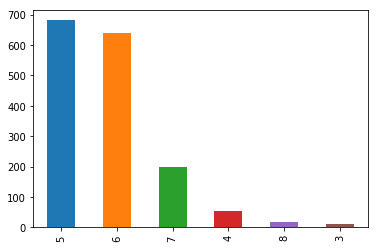

In [26]:
%matplotlib inline
ind = df_red.quality.value_counts().index
df_red.quality.value_counts()[ind].plot(kind='bar');

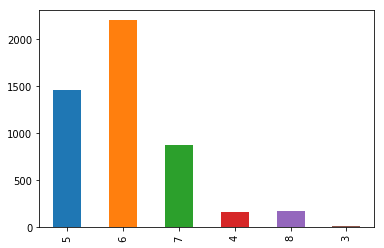

In [28]:
df_white.quality.value_counts()[ind].plot(kind='bar');

In [29]:
df_white.shape

(4898, 12)

In [30]:
df_red.shape

(1599, 12)

###### It appears as if white wine data set has higher quality samples and red wine data set has lower quality samples more

##### Quiz 3: Do wines with higher alcoholic content receive better ratings?

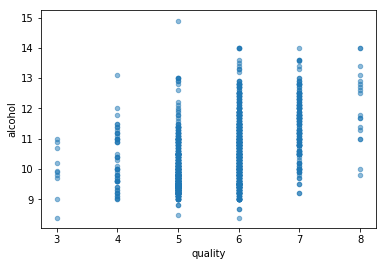

In [33]:
df_red.plot.scatter('quality', 'alcohol', alpha=0.5);

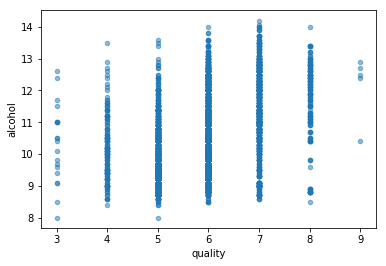

In [34]:
df_white.plot.scatter('quality', 'alcohol', alpha=0.5);

##### Higher the alcohol value higher is the quality in both red and white dataset